 # Introduction
 
 RMS Titanic sank in 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

<font color="blue">
Content:
    
1. [Load and Check Data](#1)
2. [Variable Description](#2)
   * [Univariate Variable Analysis](#3)
      * [Categorical Variable ](#4)
      * [Numerical Variable ](#5)
3. [Basic Data Anlaysis](#6)
4. [Outlier Detection](#7)
4. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
4. [Visualization](#11)   
   * [Correlation Between SibSp--Parch--Age--Fare--Survived](#12)
   * [SibSp--Survived](#13)
   * [Parch--Survived](#14)
   * [Pclass--Survived](#15)
   * [Age--Survived](#16)
   * [Pclass--Survived--Age](#17)
   * [Embarked--Sex--Pclass--Survived](#18)
   * [Embarked--Sex--Fare--Survived](#19)
   * [Filling Missing: Age Feature](#20)
5. [Feature Engineering](#21)
   * [Name--Title](#22)
   * [Family Size](#23)
   * [Embarked](#24)
   * [Ticket](#25)
   * [Pclass](#26)
   * [Sex](#27)
   * [Drop PassengerId and Cabin](#28)
5. [Modelling](#29)
   * [Train Test Split](#30)
   * [Simple Logistic Regression](#31)
   * [Hyper Parameter Tuning--GridSearch--Cross Validation](#32)
   * [Ensemble Modelling](#33)
   * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a>
# Load and Check Data

In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengerid=test_df["PassengerId"]
#When i use the data in next steps i kept the passenger id in a variable to not lose passenger id feature(?)

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()# it shows first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"></a>
# Variable Description

1. PassengerId: unique id number to each passenger
2. Survived: Passenger survive(1) or died(0)
3. Pclass: Passenger class
4. Name: Name of passenger
5. Sex: Gender of passenger     
6. Age: Age of passenger
7. SibSp: Number of siblings/spouses
8. Parch: Number of parents/children
9. Ticket: Number of ticket
10. Fare: Amount of money spend on ticket
11. Cabin: Cabin category
12. Embarked: Port where passenger embarked(C=Cherbourg, Q=Queenstown,S=Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Age and Fare
* int64(5): PassengerId, Survived, Pclass, SibSp, Parch
* object(5): Name, Sex, Ticket, Cabin, Embarked

<a id="3"></a>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Parch

* Numerical Variable: Fare, Age, PassengerId

<a id="4"></a>
## Categorical Variable


In [7]:
def bar_plot(variable):
    
    # input: variable ex: "Sex"
    # output: bar plot and value count

    # get feature
    var=train_df[variable]

    #count number of categorical variable
    varValue=var.value_counts()

    #visualiza

    plt.figure(figsize=(10,4)) #Size of figure
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable, varValue))



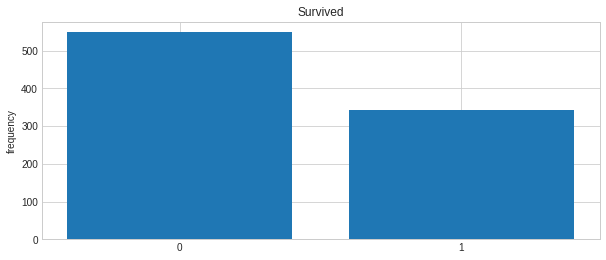

Survived 
 0    549
1    342
Name: Survived, dtype: int64


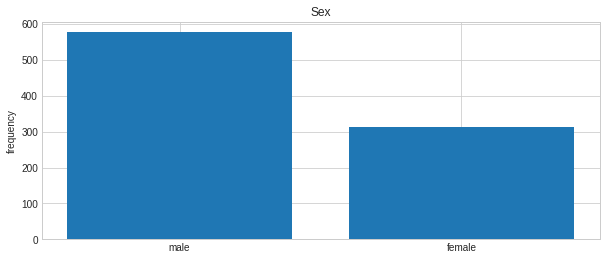

Sex 
 male      577
female    314
Name: Sex, dtype: int64


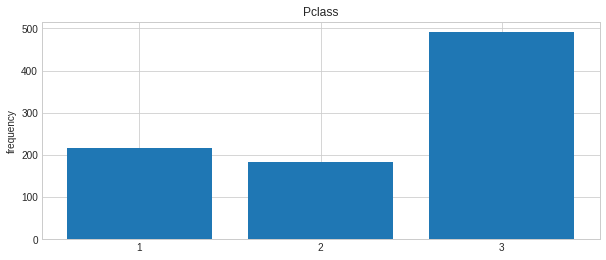

Pclass 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


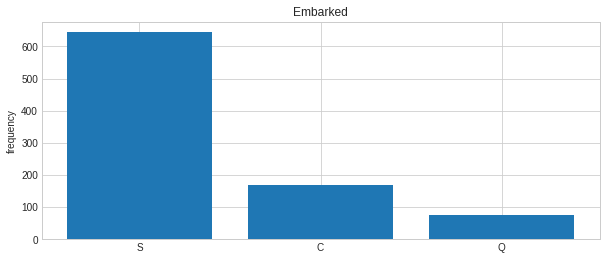

Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


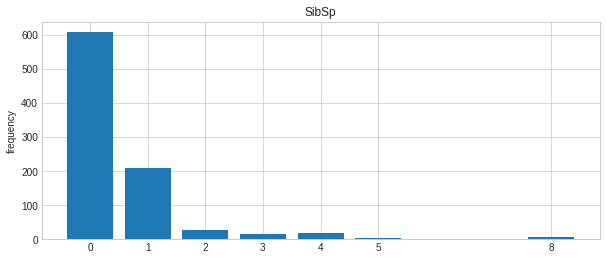

SibSp 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


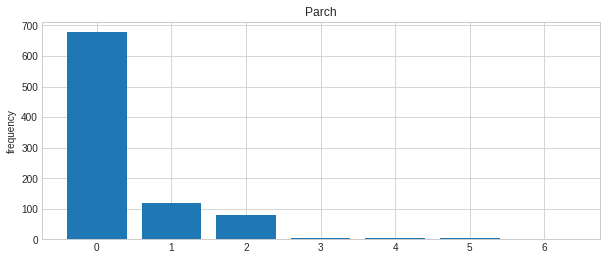

Parch 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]

for i in category:
  bar_plot(i)

In [9]:
category2 = ["Cabin","Name","Ticket"]

for i in category2:
  print("{} \n".format(train_df[i].value_counts()))

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
D10 D12        1
C128           1
D48            1
B19            1
C46            1
Name: Cabin, Length: 147, dtype: int64 

Mineff, Mr. Ivan                                     1
Kalvik, Mr. Johannes Halvorsen                       1
Dean, Mr. Bertram Frank                              1
Astor, Mrs. John Jacob (Madeleine Talmadge Force)    1
Hart, Mrs. Benjamin (Esther Ada Bloomfield)          1
                                                    ..
McCormack, Mr. Thomas Joseph                         1
Dantcheff, Mr. Ristiu                                1
Ryan, Mr. Patrick                                    1
Mangan, Miss. Mary                                   1
Sivic, Mr. Husein                                    1
Name: Name, Length: 891, dtype: int64 

347082      7
1601        7
CA. 2343    7
347088      6
CA 2144     6
           ..
244278      1
2685        1
5727        1
3

<a id="5"></a>
## Numerical Variable

In [10]:
def plot_hist(variable):
    plt.figure(figsize=(10,4))
    plt.hist(train_df[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with histogram".format(variable))
    plt.show()

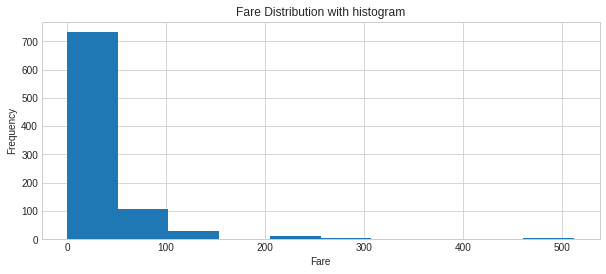

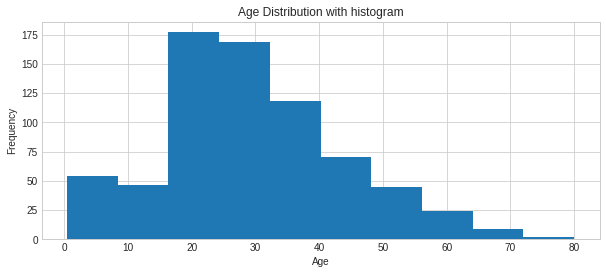

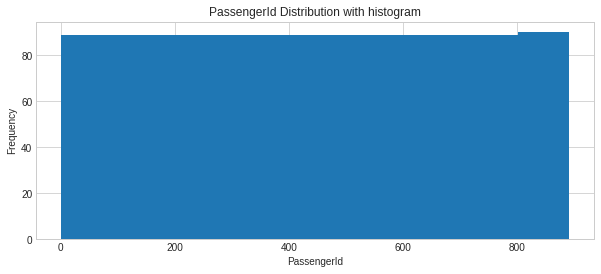

In [11]:
numericVariable=["Fare","Age","PassengerId"]
for i in numericVariable:
    plot_hist(i)

<a id="6"></a>
# Basic Data Anlaysis

* Pclass-Survived
* Sex-Survived
* Age-Survived
* SibSp-Survived
* Parch-Survived

In [12]:
#Pclass-Survived

train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
#Sex-Survived

train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
#Age-Survived

train_df[["Age","Survived"]].groupby(["Age"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [15]:
#Sibsp-Survived

train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
#Parch-Survived

train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id="7"></a>
# Outlier Detection

### What is Outlier?

If there is a value in a data set that differs greatly from other values, that value may affect the result incorrectly. For example, if the numbers are 2,4,6,7,8,78 in a series of numbers, the number 78 prevents the average from reflecting the reality. So the outlier is 78.

### How Can We Detect the Outliers?

There are a variety of techniques which we can use to identify the outliers in a data set.
* We find our quartile1(Q1),quartile3(Q3) and median values. 
* Then we find IQR(Q3-Q1)
* Multiply IQR with 1.5 (Finding outlier step)
* Q1-outlier step || Q3-outlier step
* Q1-outlier stepis show lower bound to values
* Q3-outlier step is show upper bound to values
* As a result, Values outside the upper bound and lower bound are detected as outliers

In [17]:
def detect_outliers(df,features):
    outlier_indices=[]
    for i in features:
        
        # 1st quartile
        Q1=np.percentile(df[i],25)
    
        # 3rd quartile
        Q3=np.percentile(df[i],75)
        
        #IQR
        IQR=Q3-Q1
        
        #Outlier step
        Outlier_Step=IQR*1.5
        
        
        #detect outlier and their indeces
        outlier_list=df[(df[i]<Q1-Outlier_Step) | (df[i]>Q3-Outlier_Step)].index
        #store indeces
        outlier_indices.extend(outlier_list)
    outlier_indices=Counter(outlier_indices)#her sample kaç tane outlier içeriyoru bulur. 
    #Bunu neden yapıyoruz? eğer birden fazla featureda outlier varsa o sample ı yani yolcuyu öyle çıkarırız.
    #Bir yolcu için sadece bir feature da outlier varsa çıkarmaya gerek kalmaz.aşağıda kodu
    multiple_outliers=list(i for i, v in outlier_indices.items() if v>2)
    
    return multiple_outliers


In [18]:
train_df.loc[detect_outliers(train_df,["Age","Fare","SibSp","Parch"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [19]:
#drop outliers

train_df=train_df.drop(detect_outliers(train_df,["Age","Fare","SibSp","Parch"]),axis=0).reset_index(drop=True)
#axis=0 means is delete the rows(?)

<a id="8"></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [20]:
train_df_len=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="9"></a>
## Find Missing Value

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            243
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          864
Embarked         2
dtype: int64

<a id="10"></a>
## Fill Missing Value

* Embarked has 2 missing value
* Fare has only one

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
48,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
633,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


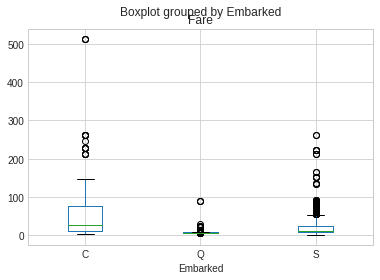

In [25]:
train_df.boxplot(column="Fare", by ="Embarked")
plt.show()

In [26]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
830,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id="11"></a>
# Visualization

<a id="12"></a>
## Correlation Between SibSp--Parch--Age--Fare--Survived

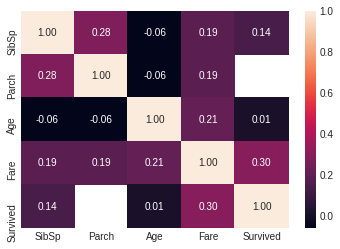

In [29]:
list=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list].corr(),annot=True,fmt=".2f")#with annot i can see the correlation values
plt.show()

Fare feature has correlation with Survived feature(0.30).

<a id="13"></a>
## SibSp--Survived

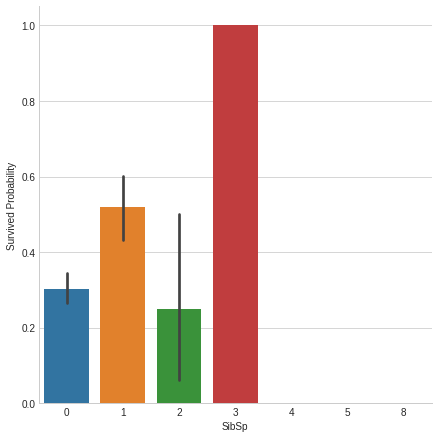

In [30]:
g=sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of Siblings/Spoises have less chance to survive.
* if SibSp==0,1,2 and passengers have more chance to survive
* We see that if SibSp==3 passengers have almost %100 chance to survive.
* We can consider a new feature describing these features.
* There is a std in survival of passengers with parch=2

<a id="14"></a>
## Parch--Survived

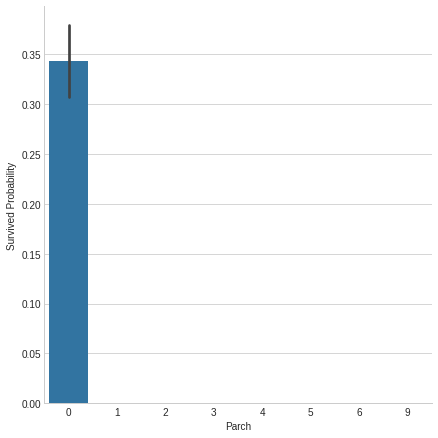

In [31]:
g=sns.factorplot(x="Parch",y="Survived",kind="bar",data=train_df,size=6)
g.set_ylabels("Survived Probability")
plt.show()

* The Passengers who have no Parch have more chance to survive.
* The Passengers who have Parch have not chance to survive.
* Siyah ok standart sapmayı gösterir.
* SibSp and Parch can be used for new feature extraction with th=1

<a id="15"></a>
## Pclass--Survived

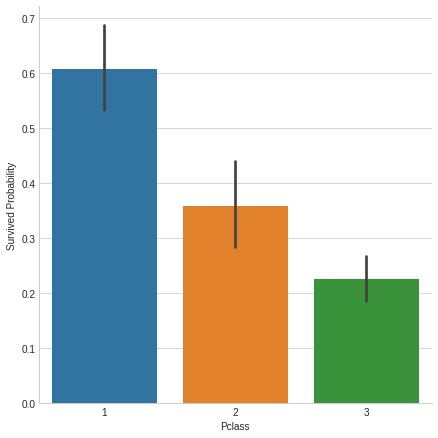

In [32]:
g=sns.factorplot(x="Pclass",y="Survived",kind="bar",data=train_df,size=6)
g.set_ylabels("Survived Probability")
plt.show()

* As we see from the plot, Pclass have great result.

<a id="16"></a>
## Age--Survived

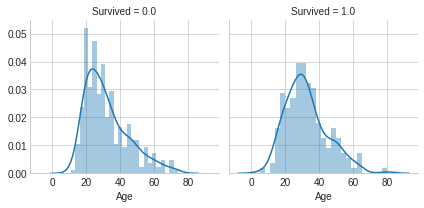

In [33]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(sns.distplot, "Age",bins=25)
plt.show()

* Age <=10 has a high survival rate.
* Oldest passengers survived.
* Large number of 20s  did not survived.
* Most passengers are in 20-40 age range.
* We can use age feature in training.
* We can use age distribution for missing value of age.

<a id="17"></a>
## Pclass--Survived--Age

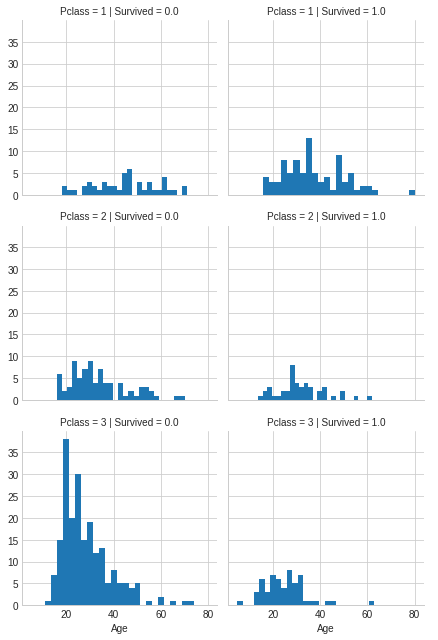

In [34]:
g=sns.FacetGrid(train_df,col="Survived",row="Pclass",size=3)
g.map(plt.hist,"Age",bins=25)
g.add_legend()#(?)
plt.show()

* It is clear that Pclass is effect the chance of survival.
* Pclass is important feature to model training.

<a id="18"></a>
## Embarked--Sex--Pclass--Survived

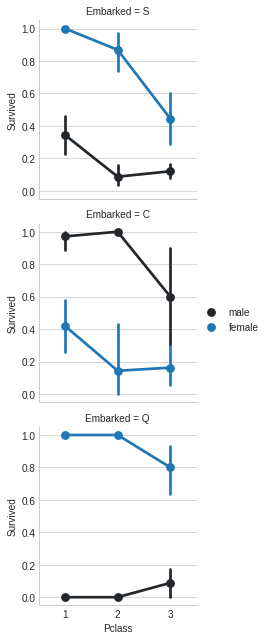

In [35]:
g=sns.FacetGrid(train_df,row="Embarked",size=3)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than  males.
* Male passengers have better survival rate in pclass 3 in C.
* Embarked and Sex features will be used in training.

<a id="19"></a>
## Embarked--Sex--Fare--Survived

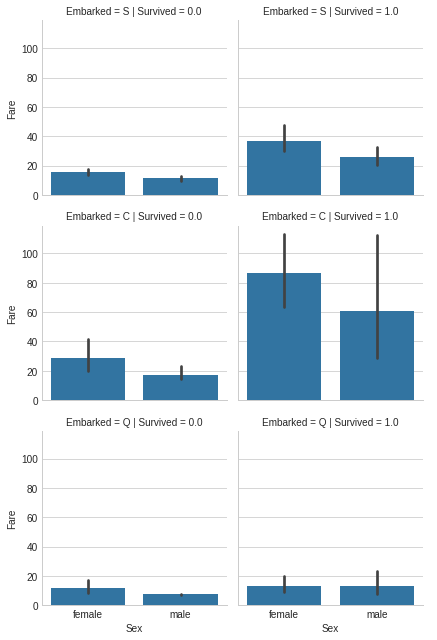

In [36]:
g=sns.FacetGrid(train_df,row="Embarked",col="Survived",size=3)
g.map(sns.barplot, "Sex","Fare")
g.add_legend()
plt.show()

* Passenger who pay higher fare have better survival rate. Fare can be used as categorical for training.

<a id="20"></a>
## Filling Missing: Age Feature

In [37]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
14,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
19,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
20,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1088,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1091,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1094,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


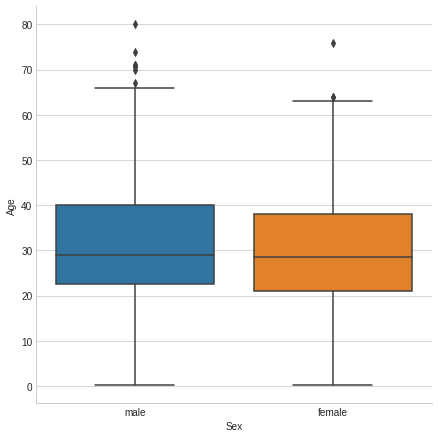

In [38]:
g=sns.factorplot(x="Sex",y="Age",data=train_df,kind="box",size=6)
plt.show()

* Horizontal line is shows the median.
* Males and Females median are close each other. Age distribution seems to be same.
* So Sex is not informative for age prediction.

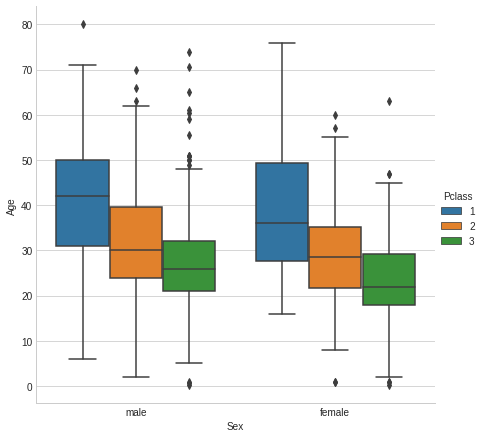

In [39]:
g=sns.factorplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box",size=6)
plt.show()

* First class passengers are older than second class passengers. Second class passengers are older than first class passenger.

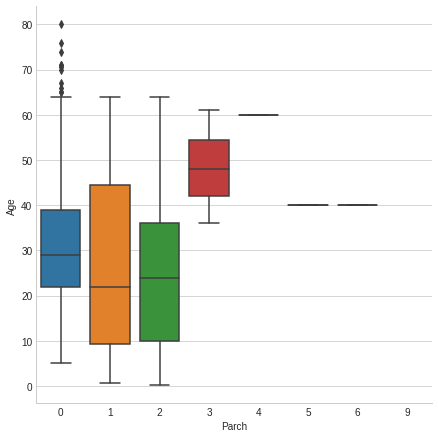

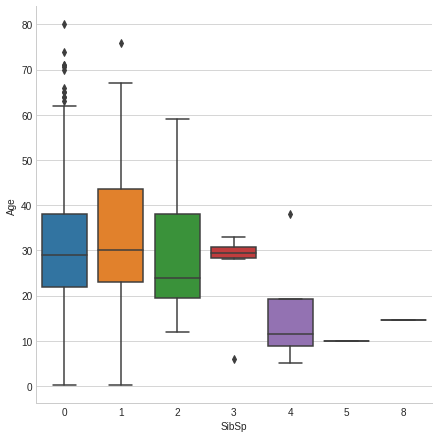

In [40]:
g=sns.factorplot(x="Parch",y="Age",data=train_df,kind="box",size=6)
sns.factorplot(x="SibSp",y="Age",data=train_df,kind="box",size=6)
plt.show()

In [41]:
train_df["Sex"]=[1 if i=="male" else 0 for i in train_df["Sex"]]
#The Sex feature is string. To see it in heatmap, we should convert "Sex feature" to integer.

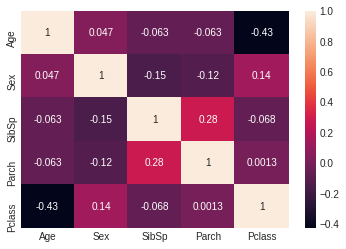

In [42]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

* The color is white because our heatmap command scales the rows before drawing the heatmap. 
* So the row  becomes a row of zeroes and zero is denoted by white in this color scheme.

* Age is not correlated with Sex, but it is correlated with SibSp, Parch, Pclass.

In [43]:


for i in  train_df["Age"][train_df["Age"].isnull()].index.tolist():
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med
#Datamızda ki kişilerden 5 nolu indexteki kişi ile aynı "SibSp" "Pclass" ve "Parch"
#değerine sahip kişileri al bunların "Age" değerlerinin medianını hesapla 
#ve age olarak bu değere eşitle,
#Yani yaşı olmayan her kişinin yaşını, bu 3 değeri aynı olan kişilerin medianını alarak dolduruyoruz,


<a id="21"></a>
# Feature Engineering

<a id="22"></a>
## Name--Title

In [44]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [45]:
name=train_df["Name"]
train_df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [46]:
train_df["Title"].head(10)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
6      Mr
7     Mrs
8    Miss
9      Mr
Name: Title, dtype: object

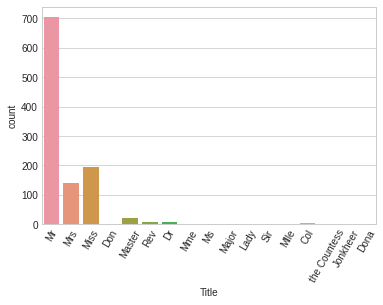

In [47]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [48]:
#rare olanları other altında topluyorum
#Convert to categorical
train_df["Title"]=train_df["Title"].replace(["Major","Lady","Sir","Col","the Countess","Jonkheer","Dona","Don","Rev","Dr"],"other")

train_df["Title"]=[0 if i=="Master" else 1 if i=="Miss" or i=="Ms" or i=="Mlle" or i=="Mrs" else 2 if i=="Mr" else 3 for i in train_df["Title"]]

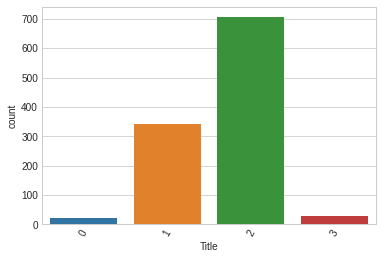

In [49]:
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=60)
plt.show()

In [50]:
train_df["Title"].head(30)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     1
8     1
9     2
10    1
11    1
12    2
13    1
14    1
15    2
16    2
17    1
18    2
19    2
20    1
21    2
22    3
23    1
24    1
25    2
26    2
27    2
28    2
29    2
Name: Title, dtype: int64

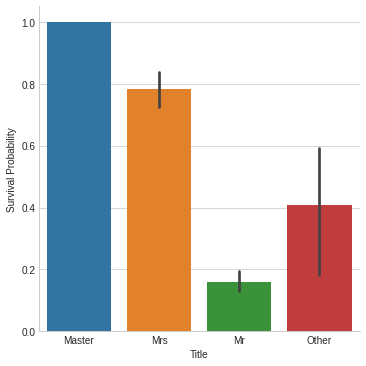

In [51]:
g=sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [52]:
#Name kullanrak yeni feature elde ettim title olarak dolayısıyla name e gerek yok artık
train_df.drop(labels=["Name"], axis=1, inplace=True)


In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [54]:
train_df=pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


Yukarıda dört feature a dönüştürdük ve eğer title 2 ise o bir oluyor.

<a id="23"></a>
## Family Size

In [55]:
# SibSp ve Parch birleşiyor
train_df["FaSize"]=train_df["SibSp"]+train_df["Parch"]+1
#artı bir, bireyin kendisini ifade ediyor.

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FaSize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


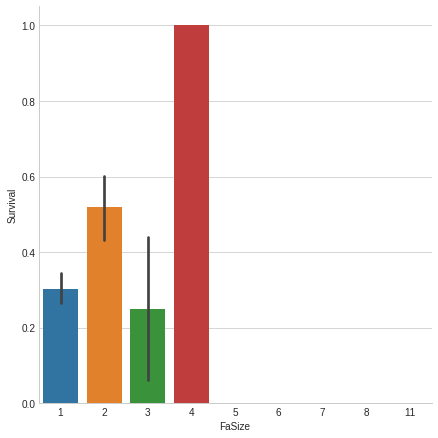

In [57]:
g=sns.factorplot(x="FaSize",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Survival")
plt.show()

In [58]:
train_df["family_size"]=[1 if i <5 else 0 for i in train_df["FaSize"]]

In [59]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FaSize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1
8,12,1.0,1,0,58.0,0,0,113783,26.5500,C103,S,0,1,0,0,1,1
9,13,0.0,3,1,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0,1,0,1,1


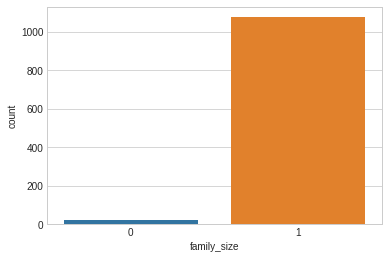

In [60]:
sns.countplot(x="family_size",data=train_df)
plt.show()

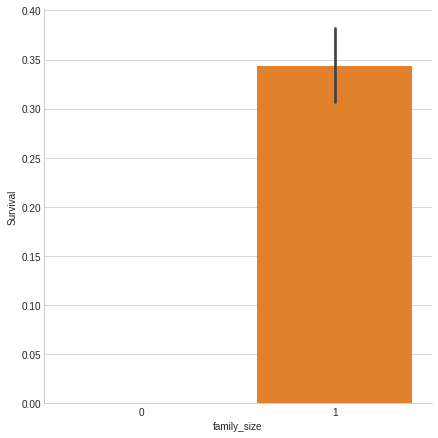

In [61]:
g=sns.factorplot(x="family_size",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Survival")
plt.show()

* We can see that small families have more chance to survival than big families.

In [62]:
train_df=pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FaSize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id="24"></a>
## Embarked

In [63]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

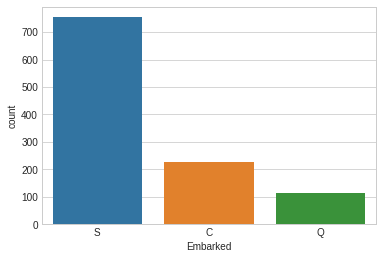

In [64]:
sns.countplot(x="Embarked",data=train_df)
plt.show()

In [65]:
#Embarked i kullanılabilir hale getiriyoruz
train_df=pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,FaSize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id="25"></a>
## Ticket

In [66]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              237736
8              113783
9           A/5. 2151
Name: Ticket, dtype: object

In [67]:
tickets=[]

for i in train_df.Ticket:
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
        
train_df["Ticket"]=tickets

In [68]:
train_df["Ticket"].head(10)

0        A5
1        PC
2    STONO2
3         x
4         x
5         x
6         x
7         x
8         x
9        A5
Name: Ticket, dtype: object

In [69]:
train_df=pd.get_dummies(train_df,columns=["Ticket"],prefix="T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id="25"></a>
## Pclass

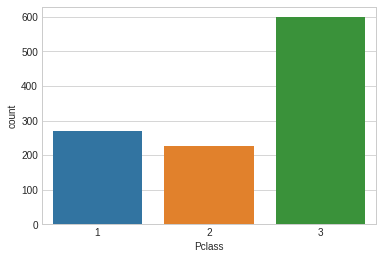

In [70]:
sns.countplot(data=train_df,x="Pclass")
plt.show()

In [71]:
train_df["Pclass"]=train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id="26"></a>
## Sex

In [72]:
train_df["Sex"]=train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id="28"></a>
## Drop PassengerId and Cabin

In [73]:
train_df.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)# these are not useful, they unnecessary
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'FaSize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id="29"></a>
# Modelling

In [74]:
#Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id="30"></a>
## Train Test Split

In [75]:
train_df_len#dataframe mizin boyutu

678

In [76]:
test=train_df[train_df_len:]#sondan al
test.drop(labels="Survived",axis=1,inplace=True)
test.head(30)

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,FaSize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
678,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
679,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
680,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
681,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
682,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0
683,14.0,0,0,9.2250,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
684,30.0,0,0,7.6292,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
685,26.0,1,1,29.0000,0,0,1,0,3,0,...,0,0,0,0,1,0,1,0,0,1
686,18.0,0,0,7.2292,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
687,21.0,2,0,24.1500,0,0,1,0,3,0,...,0,0,0,0,0,0,0,1,0,1


In [77]:
train=train_df[:train_df_len]
x_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.33,random_state=42)


print("x_train: ",len(x_train))
print("x_test: ",len(x_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))
print("test: ",len(test))


x_train:  454
x_test:  224
y_train:  454
y_test:  224
test:  418


<a id="31"></a>
## Simple Logistic Regression

In [78]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_train_score=round(lr.score(x_train,y_train)*100,2)
lr_test_score=round(lr.score(x_test,y_test)*100,2)

print("Training Accuracy:%{} ".format(lr_train_score))
print("Testing Accuracy:%{} ".format(lr_test_score))

Training Accuracy:%82.6 
Testing Accuracy:%82.59 


<a id="32"></a>
## Hyper Parameter Tuning--Grid Search--Cross Validation

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [79]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

In [80]:

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [81]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.832608695652174
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8015942028985507
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.0min finished


0.8347826086956521
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8214975845410628
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    1.3s


0.7972463768115942


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


Text(0.5, 1.0, 'Cross Validation Scores')

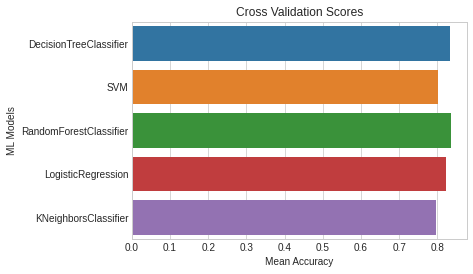

In [82]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")


<a id="33"></a>
## Ensemble Modelling

In [83]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8080357142857143


<a id="34"></a>
## Prediction and Submission

In [84]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_passengerid, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)